## Prophet Future Forecast

10:40:34 - cmdstanpy - INFO - Chain [1] start processing
10:40:36 - cmdstanpy - INFO - Chain [1] done processing


Prophet future predictions saved to 'Models/future_prophet.csv'


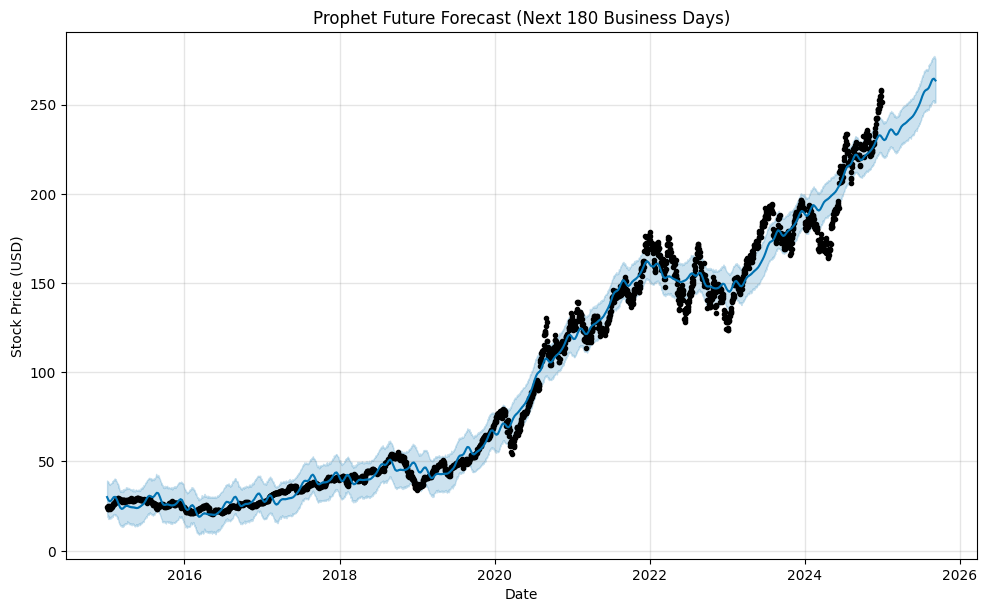

In [3]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
import os

df = pd.read_csv("AAPL_clean.csv")

df = df[['Date', 'Close']]

df = df[pd.to_numeric(df['Close'], errors='coerce').notna()]

df = df.rename(columns={'Date': 'ds', 'Close': 'y'})
df['ds'] = pd.to_datetime(df['ds'])
df['y'] = pd.to_numeric(df['y'])

model = Prophet(daily_seasonality=True, yearly_seasonality=True)
model.fit(df)

future = model.make_future_dataframe(periods=180, freq='B')
forecast = model.predict(future)

os.makedirs("Models", exist_ok=True)
prophet_output = forecast[['ds', 'yhat']].rename(columns={'ds': 'Date', 'yhat': 'Forecast'})
prophet_output.to_csv("Models/future_prophet.csv", index=False)
print("Prophet future predictions saved to 'Models/future_prophet.csv'")

fig = model.plot(forecast)
plt.title("Prophet Future Forecast (Next 180 Business Days)")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.show()